In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
directory = 'motifs_oneparamset_three_loci_0_1/'
files = [file for file in os.listdir('motifs_oneparamset_three_loci_0_1/') if 'results' in file]

In [3]:
files_msb = [file for file in os.listdir('asymmetry_paramgrid/') if 'results' in file and len(file.split('_')) == 3]
with open('asymmetry_paramgrid/'+'paramgrid_asymmetry.txt','rb') as f:
    param_grid = pickle.load(f)

In [4]:
def convert_logspace(val, true_axis, range_axis):
    possibilities = np.logspace(np.log10(true_axis[0]),np.log10(true_axis[-1]), 10000)
    closest_possibility = np.searchsorted(possibilities, val)
    converted_value = ((closest_possibility - 0) / (10000-0))*len(range_axis)
    return(converted_value)

In [5]:
with open(directory + 'paramgrid_adaptation_time_threeloci_oneparamset.txt', 'rb') as f:
    param_grid = pickle.load(f)

In [6]:
U_values = list(set([paramset['U'] for paramset in param_grid]))
tau_values = list(set([paramset['tau'] for paramset in param_grid]))
s_values = list(set([paramset['s'] for paramset in param_grid]))
pop_size_values = list(set([paramset['pop_size'] for paramset in param_grid]))
landscape_values = list(set([paramset['landscape_motifs'] for paramset in param_grid]))

1000


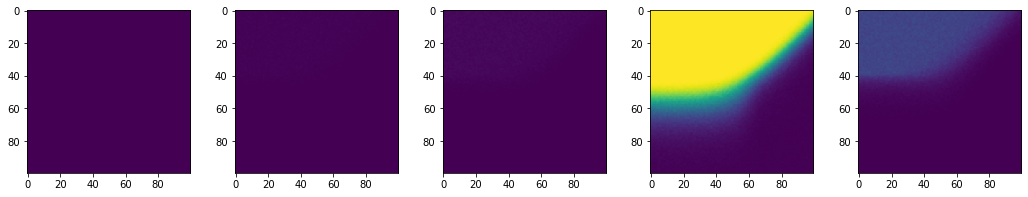

2000


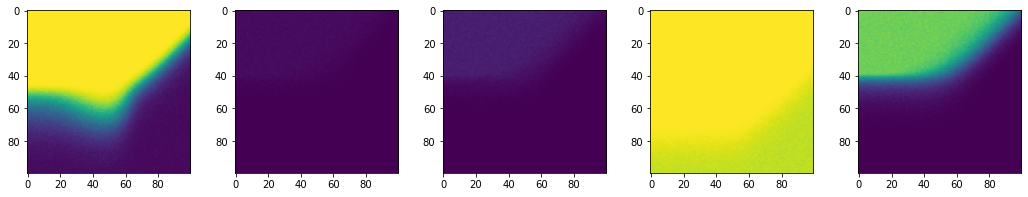

5000


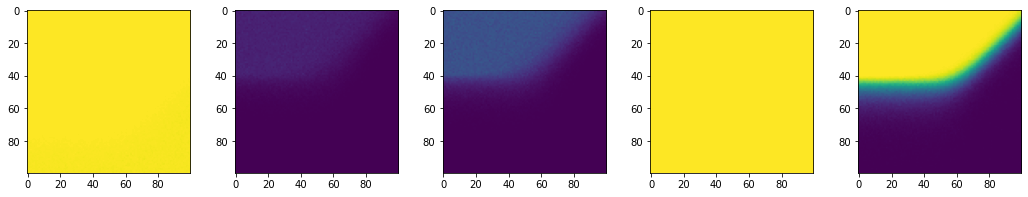

20000


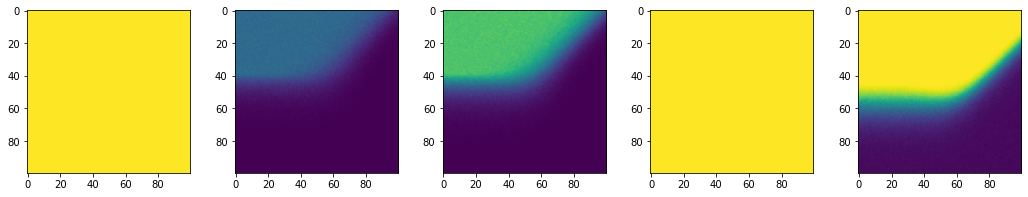

30000


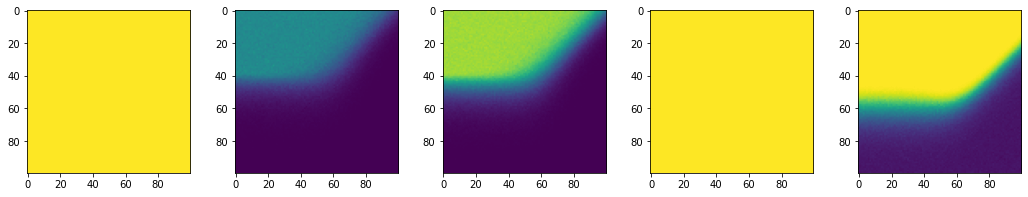

40000


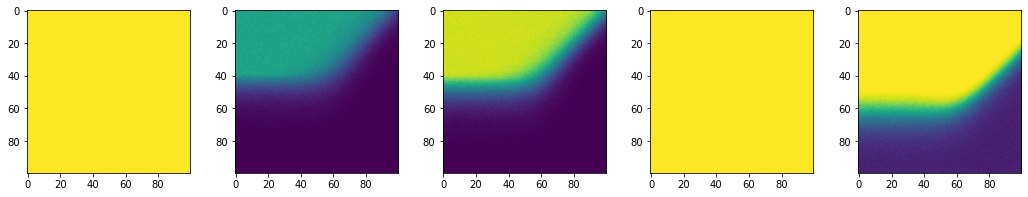

45000


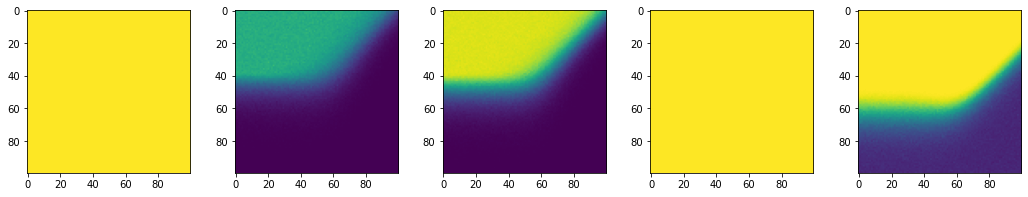

In [19]:
results_for_plot = []

for ngen in [0,1,4,19,29,39,44]:
    all_results = {}

    for landscape in landscape_values:
        all_results[landscape] = np.zeros((100,100))
        
    for i in range(len(files)):

        with open(directory + files[i], 'rb') as f:
            result = pickle.load(f)

        all_results[result['landscape_motifs']][99-result['switchingrate1'], result['switchingrate2']] = result['results'][ngen]
        
        
    results_for_plot.append(all_results)
    
    
    fig, ax = plt.subplots(1,5,figsize = (18,3))
    
    print((1+ngen)*1000)

    for l in range(5):
        ax[l].imshow(all_results[landscape_values[l]], vmin = 0, vmax = 1000)
        #ax[l].plot(np.arange(100), np.arange(100)[::-1])

        
    plt.show()

In [7]:
noise_labels = ['$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','0.95']
switching_rates = np.logspace(-6, np.log10(0.95),100)
range_axis = np.arange(99)
which_ticks = [convert_logspace(val, switching_rates, range_axis) for val in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.95]]


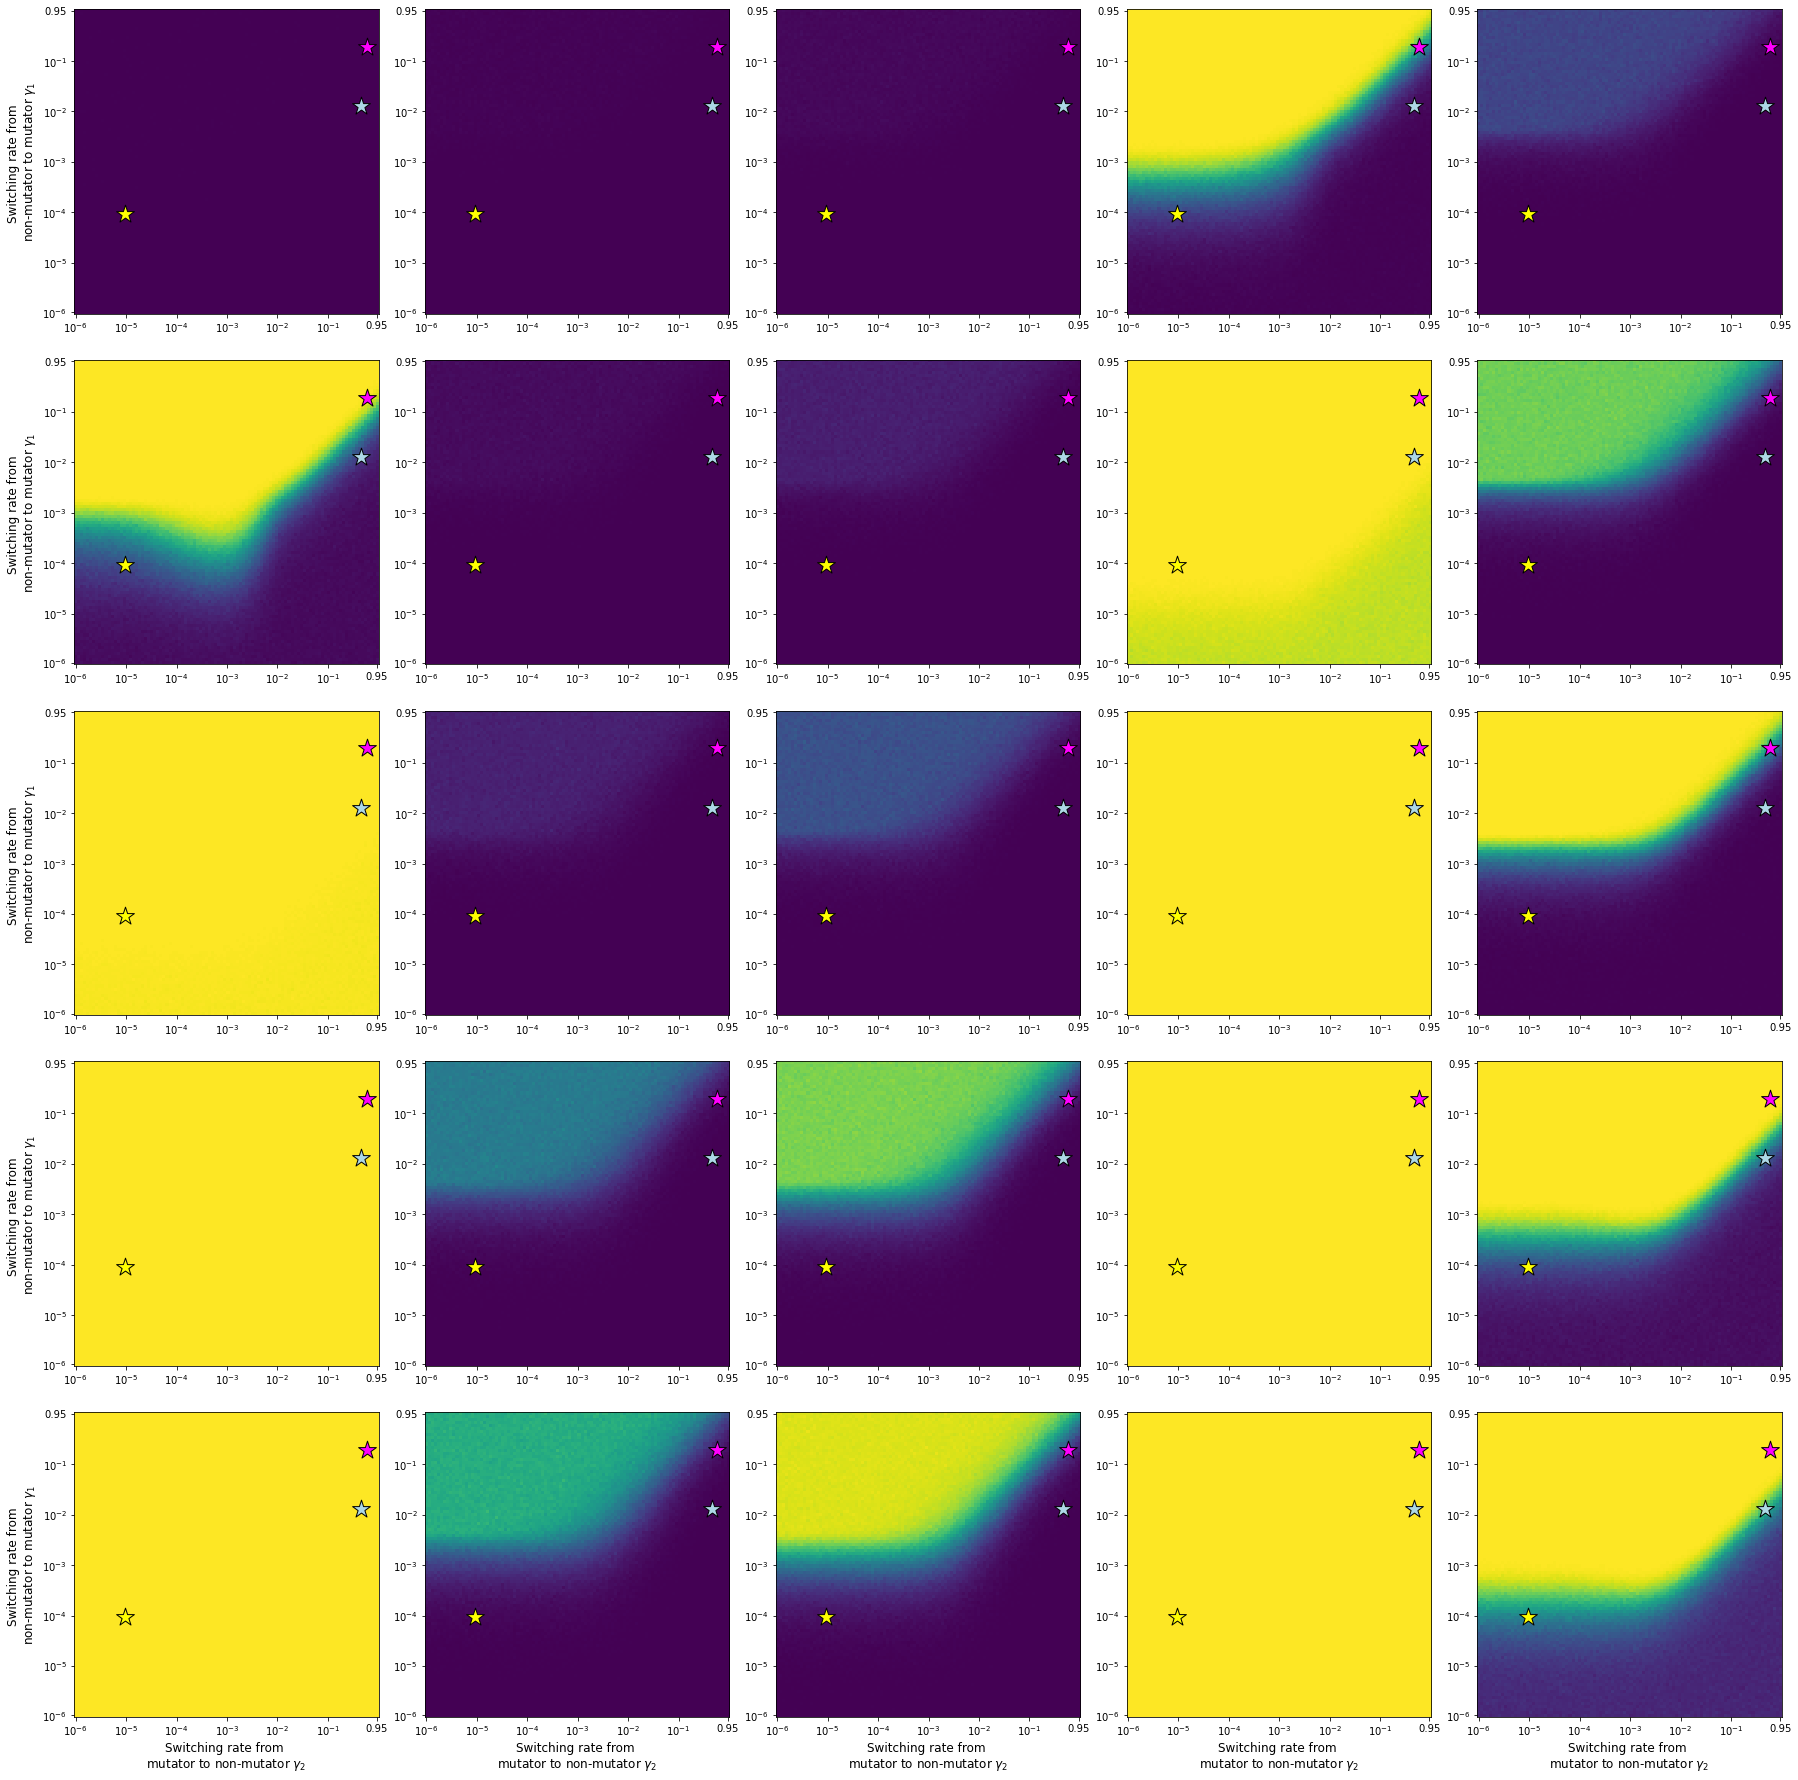

In [9]:
fig, ax = plt.subplots(5,5, figsize = (25,25))

all_ngen_to_plot = [0,1,4,24,44]

results_for_plot = []

for ngen in all_ngen_to_plot:
    all_results = {}

    for landscape in landscape_values:
        all_results[landscape] = np.zeros((100,100))
        
    for i in range(len(files)):

        with open(directory + files[i], 'rb') as f:
            result = pickle.load(f)
        all_results[result['landscape_motifs']][99-result['switchingrate1'], result['switchingrate2']] = result['results'][ngen]
        
    results_for_plot.append(all_results)

    #print((1+ngen)*1000)

    for l in range(5):
        ax[all_ngen_to_plot.index(ngen), l].imshow(all_results[landscape_values[l]], vmin = 0, vmax = 1000)
        #ax[l].plot(np.arange(100), np.arange(100)[::-1])

for i in range(5):
    for l in range(5):
        ax[i,0].set_ylabel('Switching rate from \nnon-mutator to mutator $\gamma_1$', fontsize = 12)
        ax[4,l].set_xlabel('Switching rate from \nmutator to non-mutator $\gamma_2$', fontsize = 12)
        ax[i,l].set_xticks(which_ticks)
        ax[i,l].set_xticklabels(noise_labels, fontsize = 10)
        ax[i,l].set_yticks(which_ticks)
        ax[i,l].set_yticklabels(noise_labels[::-1], fontsize = 10)

        ax[i,l].scatter(convert_logspace(1e-5, switching_rates, range_axis)-0.5,
                        100-convert_logspace(1e-4, switching_rates, range_axis), marker = '*', c = 'yellow', s= 350, edgecolors = 'k')
        ax[i,l].scatter(convert_logspace(0.5, switching_rates, range_axis)-0.5,
                        100-convert_logspace(0.014, switching_rates, range_axis), marker = '*', c = 'lightblue', s= 350, edgecolors = 'k')
        ax[i,l].scatter(convert_logspace(0.63, switching_rates, range_axis)-0.5,
                        100-convert_logspace(0.21, switching_rates, range_axis), marker = '*', c = 'magenta', s=350, edgecolors = 'k')


plt.tight_layout()
plt.savefig('figures/supplementary_three_motifs_allgens_JAN21.jpg', dpi = 400, bbox_inches = 'tight')
plt.show()

In [11]:
with open('chosen_matrices_to_plot_three_range_0_1.txt', 'wb') as f:
    pickle.dump(results_for_plot, f)

In [15]:
len(results_for_plot)

5

In [19]:
results_for_plot[0].keys()

dict_keys([(1, 1.04, 1.05), (1, 0.97, 1.03), (1, 0.99, 1.03), (1, 1.025, 1.05), (1, 1, 1.05)])